In [ ]:
# подгружаем необходимые библиотеки
import random

import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest,chi2,RFE
import matplotlib.pyplot as plt
from sklearn. preprocessing import OneHotEncoder

from sklearn. linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsRegressor

from sklearn import svm, datasets

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import RocCurveDisplay

from sklearn.preprocessing import LabelBinarizer

In [ ]:
from sklearn. model_selection import train_test_split

In [ ]:
data1=pd.read_csv('/content/Данные для построения модели+ (1).csv', error_bad_lines=False,sep=';')

<ipython-input-3-1cade772022a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1=pd.read_csv('/content/Данные для построения модели+ (1).csv', error_bad_lines=False,sep=';')


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Индикатор кризиса                     68 non-null     int64  
 1   Квартал                               68 non-null     object 
 2   Цены на жильё  (тыс,/м2)              68 non-null     float64
 3   Объем нового строительства (млн.руб)  68 non-null     float64
 4   Безработица                           68 non-null     float64
 5   Инфляция (%)                          68 non-null     float64
 6   Доля просроченных кредитов (%)        68 non-null     float64
 7   Ипотечные ставки (%)                  68 non-null     float64
 8   Уровень доходов населения             68 non-null     float64
 9   Реальный курс рубля                   68 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.4+ KB


In [ ]:
#Проверим заполненность данных и приведем все данные к числовому формату
data1['Квартал'] = pd.to_datetime(data1['Квартал'], format='%d.%m.%Y')
data1.set_index('Квартал', inplace=True)
data1

,Индикатор кризиса,"Цены на жильё (тыс,/м2)",Объем нового строительства (млн.руб),Безработица,Инфляция (%),Доля просроченных кредитов (%),Ипотечные ставки (%),Уровень доходов населения,Реальный курс рубля
Квартал,,,,,,,,,
2005-03-31,0,21013.07,448689.50,7.1,5.09,0.70,15.00,8088.0,28.60
2005-06-30,0,21693.05,258546.50,7.1,3.20,0.20,15.00,8240.0,28.49
2005-09-30,0,22497.44,428513.50,7.1,1.15,1.50,15.00,8957.0,28.75
2005-12-31,0,23779.66,618656.50,7.1,1.44,0.90,15.00,9450.0,27.72
2006-03-31,0,26174.69,487168.00,7.1,4.67,0.88,13.50,10154.0,26.84
...,...,...,...,...,...,...,...,...,...
2020-12-31,0,72857.50,2287706.75,6.1,1.12,0.86,7.72,43712.9,75.65
2021-03-31,0,75501.76,2896660.75,5.6,2.22,0.80,7.24,32981.0,73.13
2021-06-30,0,79898.67,2499140.75,4.9,2.01,0.98,7.25,38645.0,72.68


In [ ]:
#Сохраним полученные данные
data1.to_excel('Data_new.xlsx')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2005-03-31 to 2021-12-31
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Индикатор кризиса                     68 non-null     int64  
 1   Цены на жильё  (тыс,/м2)              68 non-null     float64
 2   Объем нового строительства (млн.руб)  68 non-null     float64
 3   Безработица                           68 non-null     float64
 4   Инфляция (%)                          68 non-null     float64
 5   Доля просроченных кредитов (%)        68 non-null     float64
 6   Ипотечные ставки (%)                  68 non-null     float64
 7   Уровень доходов населения             68 non-null     float64
 8   Реальный курс рубля                   68 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 5.3 KB


In [ ]:
train, test = train_test_split(data1, test_size= 0.2 , random_state= 0)

In [ ]:
X = train.drop(columns = ['Индикатор кризиса'],axis = 1)
Y = train['Индикатор кризиса']

In [ ]:
X.info()

In [ ]:
X2 = test.drop(columns = ['Индикатор кризиса'],axis = 1)
Y2 = test['Индикатор кризиса']

In [ ]:
log_regression = LogisticRegression()
# подбираем модель, используя обучающие данные
log_regression.fit(X,Y)

LogisticRegression()

In [ ]:
y_pred = log_regression.predict(X2)

In [ ]:
print(" Accuracy:",metrics. accuracy_score (Y2, y_pred))

 Accuracy: 0.7142857142857143


In [ ]:
y_pred_N = log_regression.predict(X2)

In [ ]:
print(" Accuracy:",metrics. accuracy_score (Y2, y_pred))

 Accuracy: 0.7142857142857143


In [ ]:
y_pred_proba = log_regression.predict_proba(X2)[::,1]

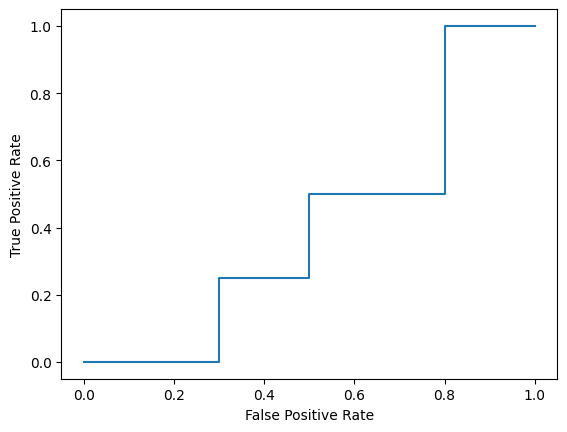

In [ ]:
fpr, tpr, _ = metrics.roc_curve(Y2, y_pred_proba)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()